In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

import h5py

from skimage.measure import label, regionprops, regionprops_table


# Importing the Recosntructions

In [2]:
f = h5py.File('recon_beta.h5', 'r')
rec = f['data/recon'][()]
beta = f['data/beta'][()]
f.close()

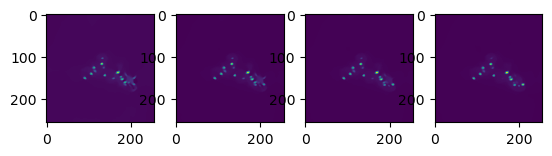

In [3]:
fig,ax = plt.subplots(1,4)
ax[0].imshow(rec[5,:,:,150])
ax[1].imshow(rec[6,:,:,150])
ax[2].imshow(rec[7,:,:,150])
ax[3].imshow(rec[8,:,:,150])

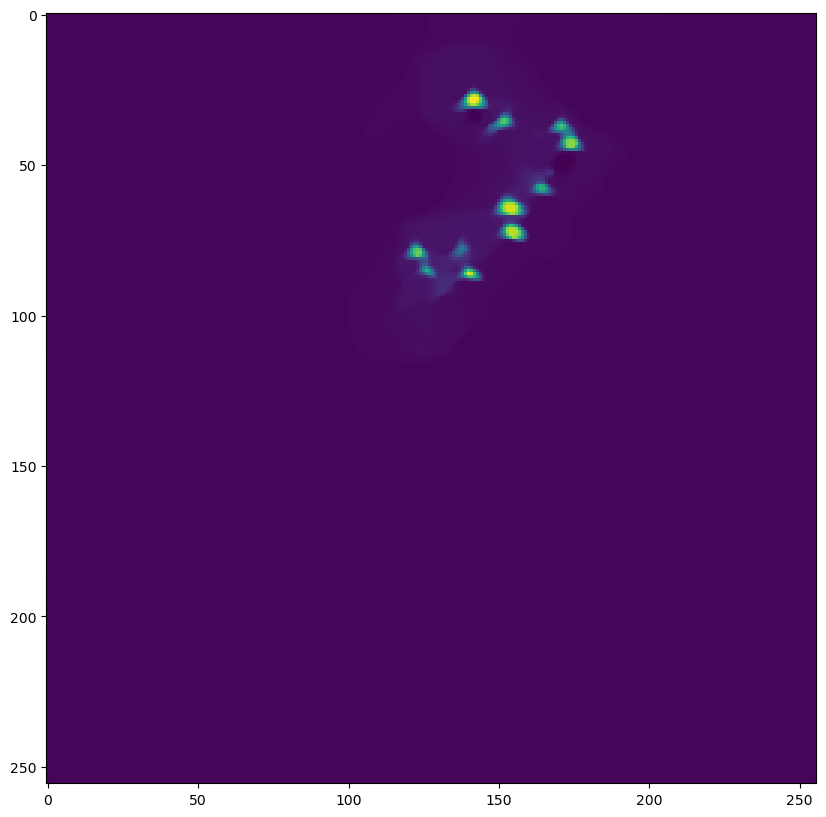

In [4]:
plt.figure(figsize=(10, 10))
plt.imshow(rec[10,:,:,45])

# Segmenting the Reconstructions

In [4]:
# Importing the image, and multiplying by 100 to improve differentiation between regions
#my_image = rec[5,:,:,26]*100
my_image = rec[5,:,:,45]*100


# Removing the noise from the image for better segmentation
binary_image = np.where(my_image < 2, 0, 1)


# Segmentation
label_img = label(binary_image)
#regions = regionprops(label_img)

props = regionprops_table(label_img, properties=('centroid',
                                                 'axis_major_length',
                                                 'axis_minor_length',
                                                'eccentricity'))

print(pd.DataFrame(props))

#for props in regions:
#    print(props.eccentricity)

    centroid-0  centroid-1  axis_major_length  axis_minor_length  eccentricity
0    23.500000  130.000000           4.498954           3.059316      0.733207
1    35.500000  124.500000           6.000000           4.098780      0.730297
2    38.870968  151.741935           7.280961           5.410043      0.669247
3    39.777778  170.555556           6.581105           5.234989      0.606009
4    45.714286  173.500000           4.208834           4.120630      0.203653
5    60.923077  163.923077           6.860889           4.784631      0.716704
6    67.600000  152.200000           3.098387           1.788854      0.816497
7    75.033333  153.733333           7.357304           5.129768      0.716843
8    80.833333  138.250000           7.805939           5.912377      0.652928
9    81.700000  122.300000           4.000000           3.149603      0.616441
10   94.400000  132.800000           3.098387           1.788854      0.816497


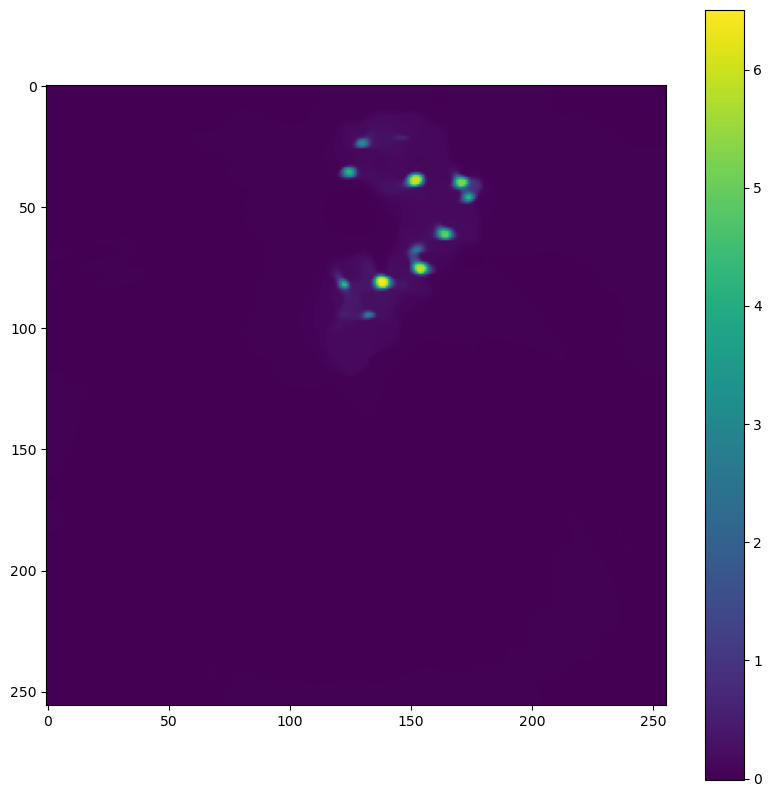

In [5]:
plt.figure(figsize=(10, 10))
im = plt.imshow(my_image)
plt.colorbar(im)
plt.show()

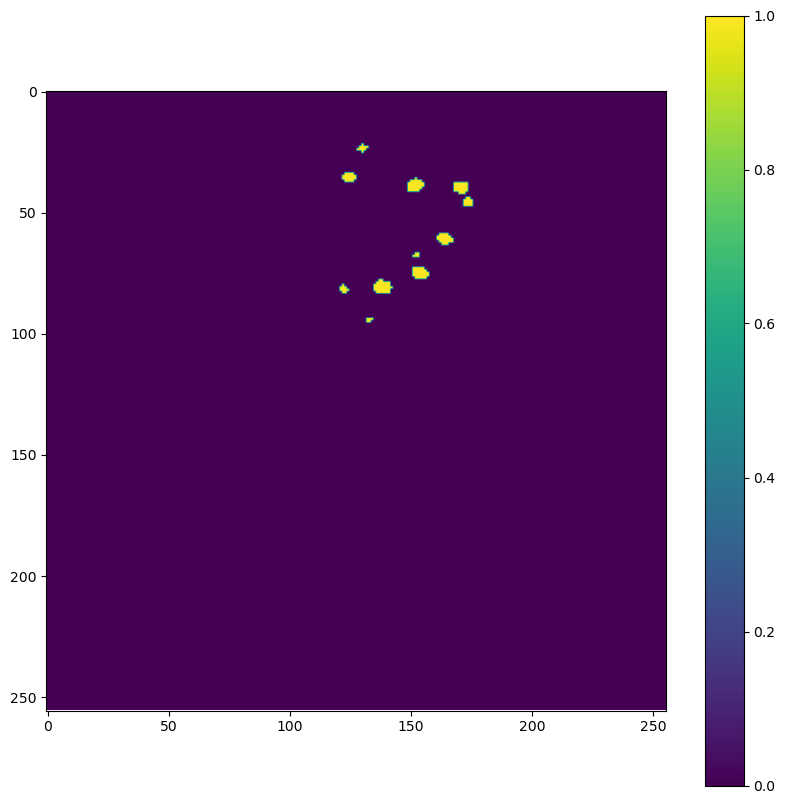

Average Eccentricity:  0.6616656678584373


In [6]:
plt.figure(figsize=(10, 10))
im = plt.imshow(binary_image)
plt.colorbar(im)
plt.show()

mean_eccentricity = np.mean(pd.DataFrame(props).eccentricity)

print("Average Eccentricity: ", mean_eccentricity)

In [7]:
average_eccentricity = np.zeros(15,)

for i_rec in range(15):
    all_current_eccentricities = np.empty(0)

    for z in range(28, 248):
        my_image = rec[i_rec,:,:,z]*100

        # Removing the noise from the image for better segmentation
        binary_image = np.where(my_image < 2, 0, 1)

        label_img = label(binary_image)

        props = regionprops_table(label_img, properties=('centroid',
                                                 'axis_major_length',
                                                 'axis_minor_length',
                                                'eccentricity'))

        #fig,ax = plt.subplots(1,2)
        #ax[0].imshow(my_image)
        #ax[1].imshow(binary_image)

        all_current_eccentricities = np.append(all_current_eccentricities, pd.DataFrame(props).eccentricity.to_numpy())

        #print(all_current_eccentricities.shape)
    average_eccentricity[i_rec] = np.mean(all_current_eccentricities)
    print(i_rec, beta[i_rec], average_eccentricity[i_rec])


0 -2.5 0.7505256666748906
1 -2.142857142857143 0.7494677889885079
2 -1.7857142857142856 0.7339098730104906
3 -1.4285714285714286 0.7088844087054953
4 -1.0714285714285714 0.6989122541482503
5 -0.7142857142857142 0.6783110206231462
6 -0.3571428571428572 0.6684765728333383
7 0.0 0.6603279753019698
8 0.3571428571428572 0.658386717613229
9 0.7142857142857144 0.6725611543742677
10 1.0714285714285716 0.6904309516834873
11 1.4285714285714288 0.7147829294208238
12 1.7857142857142856 0.7345727819537802
13 2.1428571428571432 0.7507907881950912
14 2.5 0.760637951099761


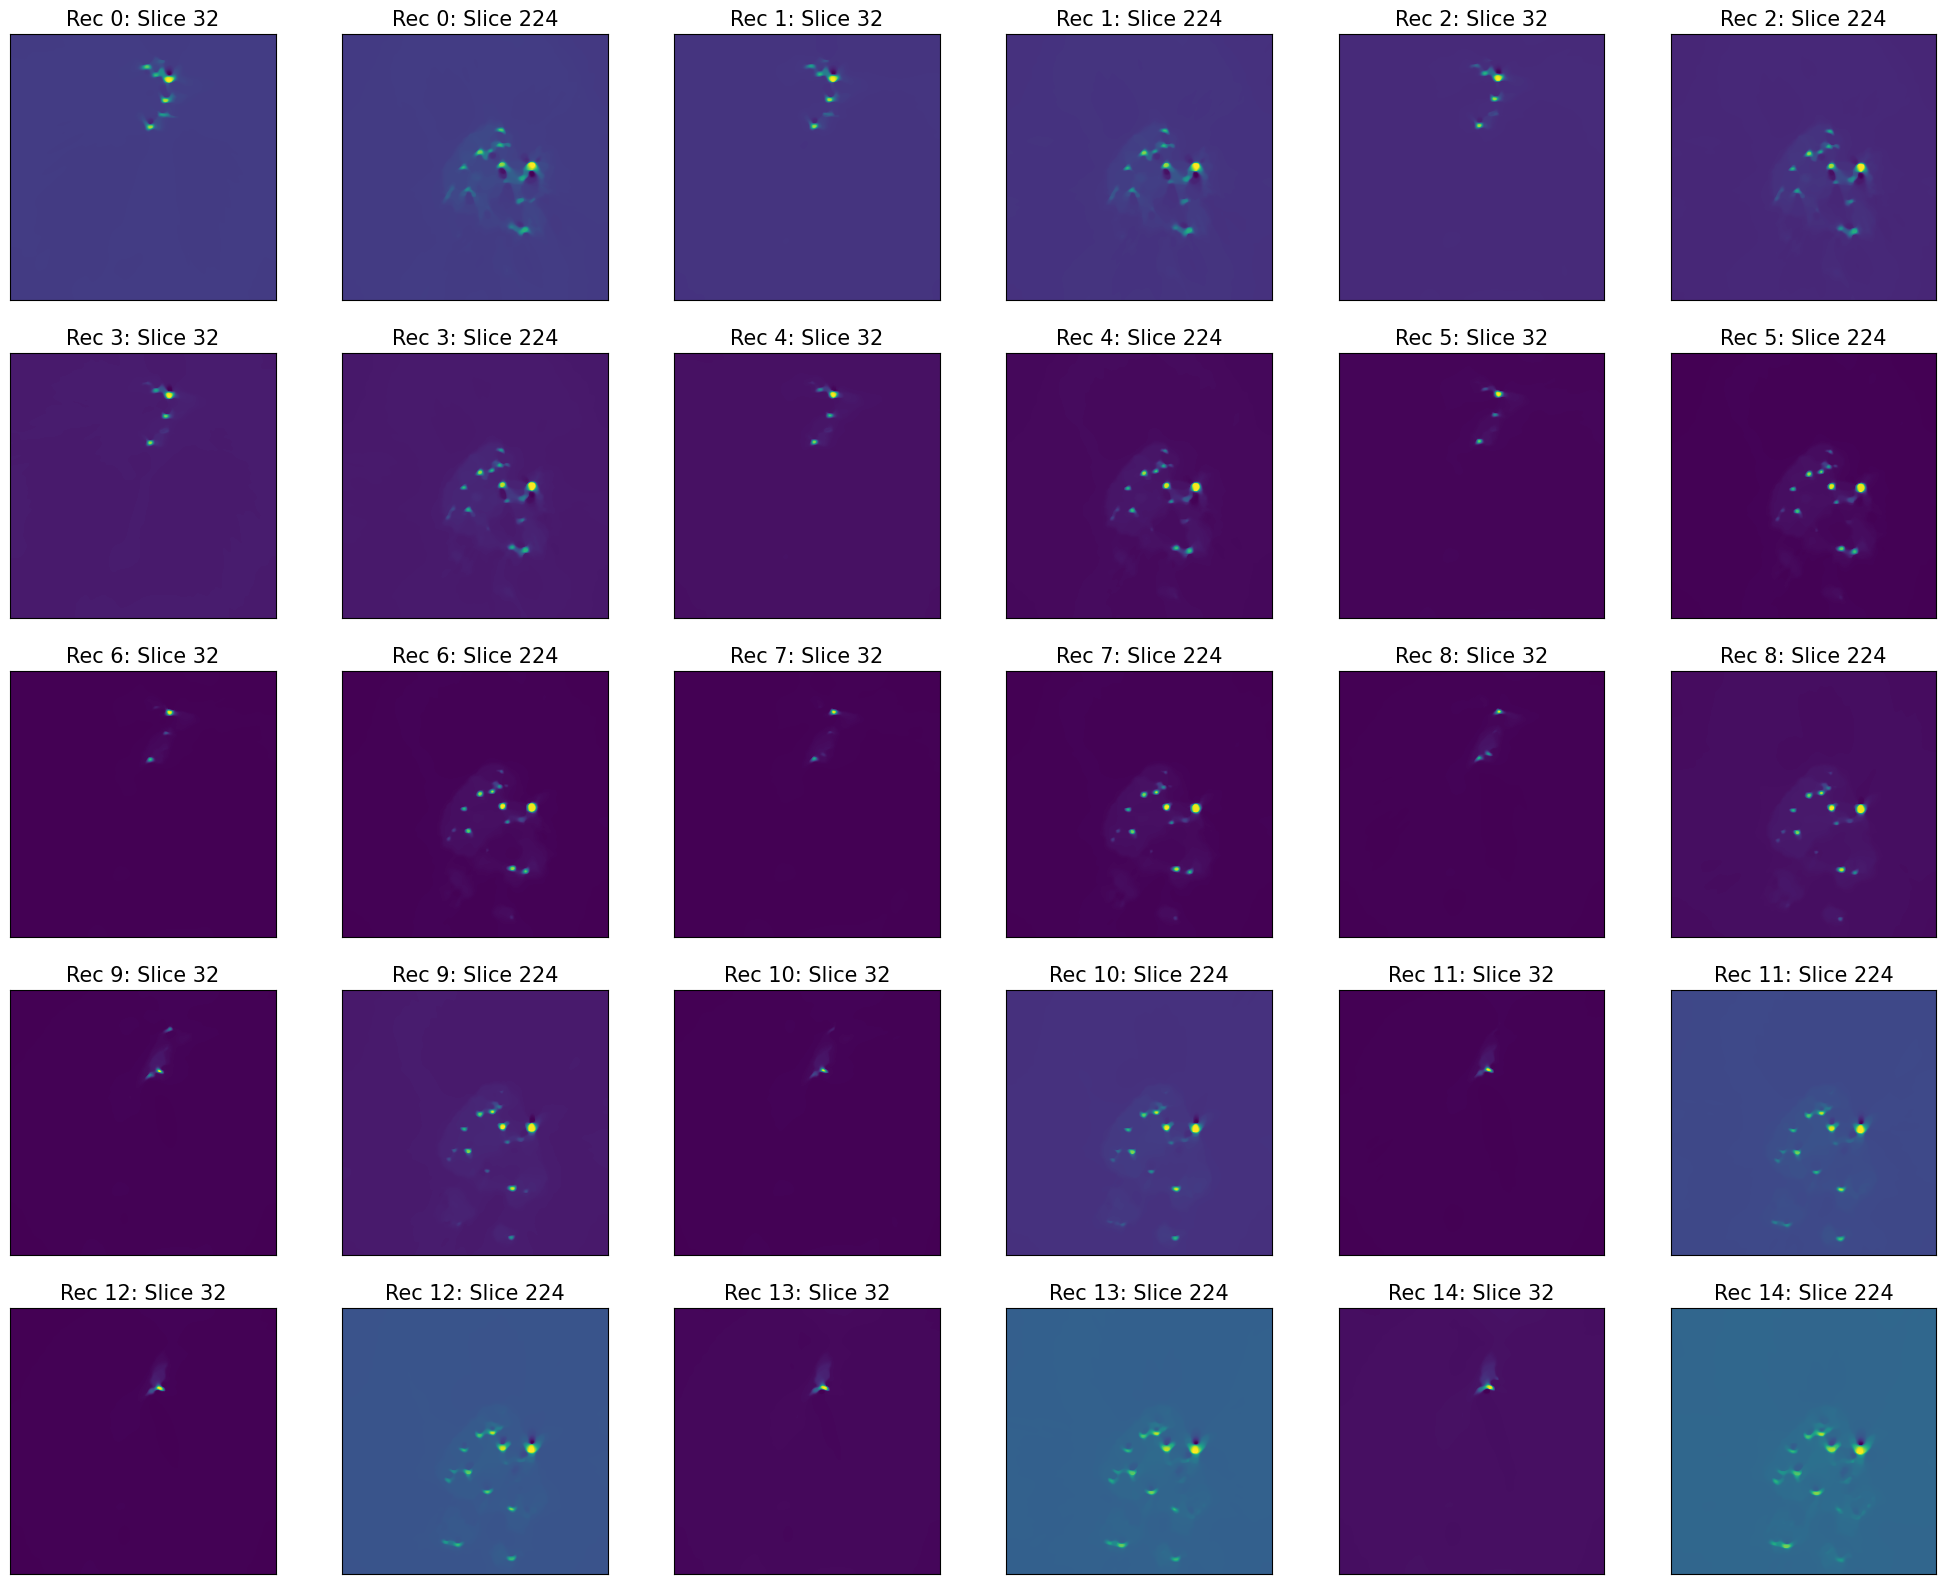

In [8]:
fig, ax = plt.subplots(5, 6, figsize=(25, 20))
ind = 32
for i in range(5):
    for j in range(6):
        ax[i,j].set_xticks([]); ax[i,j].set_yticks([])
    ax[i,0].set_title('Rec %d: Slice %d' %(3*i, ind), size=15)
    ax[i,1].set_title('Rec %d: Slice %d' %(3*i, 256-ind), size=15)
    ax[i,2].set_title('Rec %d: Slice %d' %(3*i+1, ind), size=15)
    ax[i,3].set_title('Rec %d: Slice %d' %(3*i+1, 256-ind), size=15)
    ax[i,4].set_title('Rec %d: Slice %d' %(3*i+2, ind), size=15)
    ax[i,5].set_title('Rec %d: Slice %d' %(3*i+2, 256-ind), size=15)
    
for i in range(5):
    ax[i,0].imshow(rec[3*i,:,:,ind]); ax[i,1].imshow(rec[3*i,:,:,-ind])
    ax[i,2].imshow(rec[3*i+1,:,:,ind]); ax[i,3].imshow(rec[3*i+1,:,:,-ind])
    ax[i,4].imshow(rec[3*i+2,:,:,ind]); ax[i,5].imshow(rec[3*i+2,:,:,-ind])
    